In [1]:
import scrapy
from bs4 import BeautifulSoup as sp
from urllib.request import urlopen as uReq

In [92]:
my_url=[]
for i in range(1,6):
    my_url.append('https://www.flipkart.com/search?q=iphones&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page='+str(i))
uclinet=uReq(my_url[0])
page_html=uclinet.read()
page_sp=sp(page_html,"html.parser")
containers=page_sp.findAll("div",{"class":"_3O0U0u"})
print(len(containers))
print(sp.prettify(containers[0]))

https://www.flipkart.com/search?q=iphones&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=1
https://www.flipkart.com/search?q=iphones&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2
https://www.flipkart.com/search?q=iphones&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=3
https://www.flipkart.com/search?q=iphones&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=4
https://www.flipkart.com/search?q=iphones&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=5
24
<div class="_3O0U0u">
 <div data-id="MOBEN2YYKU9386TQ" style="width:100%">
  <div class="_1UoZlX">
   <a class="_31qSD5" href="/apple-iphone-6s-space-grey-32-gb/p/itmen2yyjfzpspyg?pid=MOBEN2YYKU9386TQ&amp;srno=s_1_1&amp;otracker=search&amp;otracker1=search&amp;lid=LSTMOBEN2YYKU9386TQCCN1OM&amp;fm=organic&amp;iid=b76e9670-521b-48ef-9aee-5073f94e6d22.MOBEN2YYKU9386TQ.SEARCH&amp;ssid=c000ycc8

In [93]:
if containers[8].findAll("div",{"class":"VGWI6T"})!=[]:
    print(containers[8].findAll("div",{"class":"VGWI6T"}))
else:
    print("0")
for contain in containers:
    print("product_name: ",contain.div.img['alt'])
    print("ratings: ",(contain.findAll("div",{"class":"hGSR34"})[0].text))
    print("price: ",(contain.findAll("div",{"class":"_1vC4OE _2rQ-NK"})[0].text).replace(',',''))
    if contain.findAll("div",{"class":"VGWI6T"})!=[]:
        print("discount: ",(contain.findAll("div",{"class":"VGWI6T"})[0].text.split('%')[0]))
    else:
        print("discount: 0")
    print("\n\n")
    #print(contain.findAll("div",{"class":"hGSR34"}.text),"\n\n")
    #print(contain.findAll("div",{"class":"hGSR34"}.text),"\n\n")
    

0
product_name:  Apple iPhone 6s (Space Grey, 32 GB)
ratings:  4.5
price:  ₹27999
discount:  6



product_name:  Apple iPhone 6s (Gold, 32 GB)
ratings:  4.5
price:  ₹27999
discount:  6



product_name:  Apple iPhone 6s (Rose Gold, 32 GB)
ratings:  4.5
price:  ₹27999
discount:  6



product_name:  Apple iPhone XR (Black, 128 GB)
ratings:  4.6
price:  ₹62999
discount:  23



product_name:  Apple iPhone XR ((PRODUCT)RED, 64 GB)
ratings:  4.6
price:  ₹57999
discount:  24



product_name:  Apple iPhone XR (White, 64 GB)
ratings:  4.6
price:  ₹57999
discount:  24



product_name:  Apple iPhone X (Silver, 64 GB)
ratings:  4.6
price:  ₹69999
discount:  23



product_name:  Apple iPhone XR (White, 128 GB)
ratings:  4.6
price:  ₹62999
discount:  23



product_name:  Apple iPhone XS Max (Silver, 64 GB)
ratings:  4.7
price:  ₹109900
discount: 0



product_name:  Apple iPhone XR (Black, 64 GB)
ratings:  4.6
price:  ₹57999
discount:  24



product_name:  Apple iPhone XR (Blue, 64 GB)
ratings:  4.6
p

In [94]:
file='product.csv'
f=open(file,'w')
headers="PrductName,Rating,Price(Rs),Discount(%)\n"
f.write(headers)
for url in my_url:
    uclinet=uReq(url)
    page_html=uclinet.read()
    page_sp=sp(page_html,"html.parser")
    containers=page_sp.findAll("div",{"class":"_3O0U0u"})
    for contain in containers:
        product_name=contain.div.img['alt']
        ratings=(contain.findAll("div",{"class":"hGSR34"})[0].text)
        price=(contain.findAll("div",{"class":"_1vC4OE _2rQ-NK"})[0].text).split('₹')[1].replace(',','')
        if contain.findAll("div",{"class":"VGWI6T"})!=[]:
            discount=(contain.findAll("div",{"class":"VGWI6T"})[0].text.split('%')[0])
        else:
            discount= "0"
        f.write(product_name.replace(',','|')+','+ratings+','+price+','+discount+'\n')
f.close()

                              PrductName  Rating  Price(Rs)  Discount(%)
0    Apple iPhone 6s (Space Grey| 32 GB)     4.5      27999            6
1          Apple iPhone 6s (Gold| 32 GB)     4.5      27999            6
2     Apple iPhone 6s (Rose Gold| 32 GB)     4.5      27999            6
3        Apple iPhone XR (Black| 128 GB)     4.6      62999           23
4  Apple iPhone XR ((PRODUCT)RED| 64 GB)     4.6      57999           24
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 4 columns):
PrductName     111 non-null object
Rating         111 non-null float64
Price(Rs)      111 non-null int64
Discount(%)    111 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.5+ KB


,Rating,Price(Rs),Discount(%)
Rating,1.000000,0.556077,0.194786
Price(Rs),0.556077,1.000000,-0.173052
Discount(%),0.194786,-0.173052,1.000000


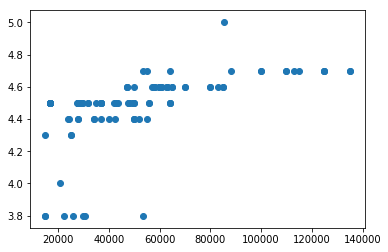

In [95]:
import pandas as pd
df=pd.read_csv('product.csv')
print(df.head())
import matplotlib.pyplot as plt
df.info()
plt.scatter(df['Price(Rs)'],df['Rating'])
df.corr()